In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
train = pd.read_csv("train.csv", encoding="utf-8", index_col=0)
test = pd.read_csv("test.csv", encoding="utf-8", index_col=0)
submission = pd.read_csv("sample_submission.csv", encoding="utf-8", index_col=0)

In [5]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78587 entries, 0 to 78586
Columns: 125 entries, 2009-01 to 2019-05
dtypes: float64(125)
memory usage: 75.5 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 78587 to 88586
Columns: 113 entries, 2009-01 to 2018-05
dtypes: float64(113)
memory usage: 8.7 MB


In [6]:
train.head()

,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,...,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05
id,,,,,,,,,,,,,,,,,,,,,
0,26.68,11.86,19.77,14.83,7.90,2.96,5.93,4.94,4.94,4.94,...,1.97,0.98,2.96,4.94,6.91,9.88,0.00,2.96,7.90,4.94
1,107.73,77.09,79.09,4.94,48.44,22.74,33.61,23.72,23.72,25.70,...,11.85,11.85,19.76,22.73,38.54,145.28,56.33,62.26,58.31,32.61
2,94.88,90.93,78.10,66.24,38.55,25.70,27.68,26.69,18.78,15.81,...,0.00,0.00,0.00,0.00,81.04,130.45,71.15,0.00,0.00,0.00
3,0.00,0.00,149.29,51.41,6.92,8.89,2.96,2.96,1.97,3.95,...,0.00,0.00,5.92,26.68,74.12,158.12,159.11,105.75,86.97,43.48
4,97.85,97.85,70.19,60.31,31.63,25.70,20.76,22.74,20.76,20.76,...,8.89,8.89,16.80,22.73,20.75,26.68,32.61,19.76,21.74,15.81


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78587 entries, 0 to 78586
Columns: 125 entries, 2009-01 to 2019-05
dtypes: float64(125)
memory usage: 75.5 MB


In [8]:
sum(sum(train.isnull().values))

0

In [9]:
sum(sum(test.isnull().values))

0

In [10]:
choice = 100
choice_id = list(np.random.choice(train.index, choice, replace=False))

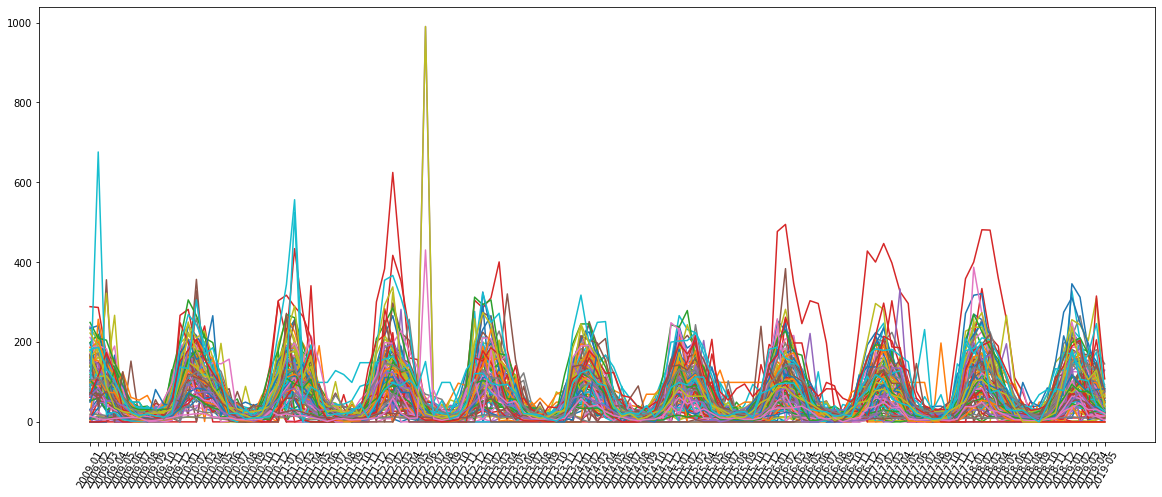

In [11]:
plt.figure(figsize=(20,8))
for i in choice_id:
    plt.plot(train.columns, train.loc[i].values)
    plt.xticks(rotation='60');

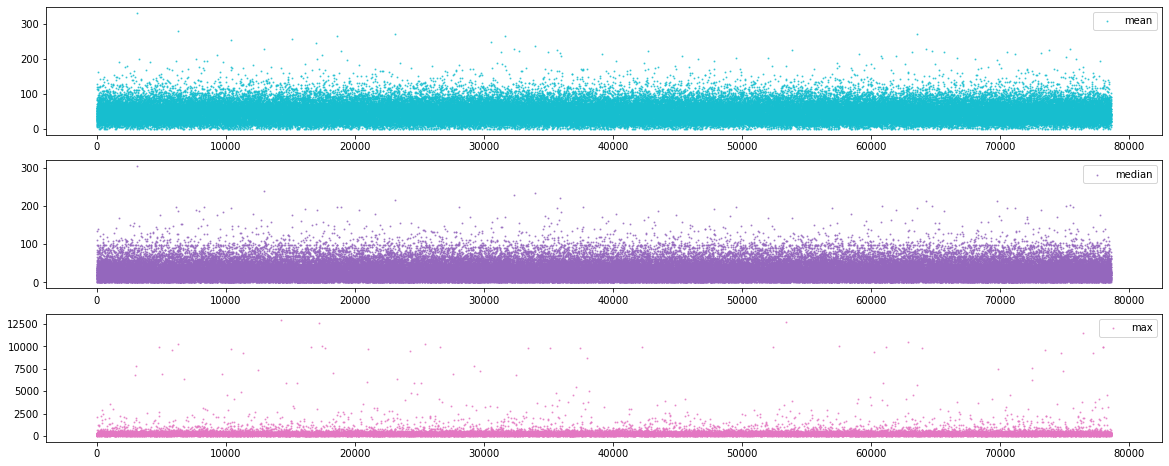

In [12]:
plt.figure(figsize=(20,8))
plt.subplot(311)
plt.scatter(range(len(train)), np.mean(train.values, axis=1), s=1, c="C9", alpha=0.7, label="mean")
plt.legend()

plt.subplot(312)
plt.scatter(range(len(train)), np.median(train.values, axis=1), s=1, c="C4", alpha=0.7, label="median")
plt.legend()

plt.subplot(313)
plt.scatter(range(len(train)), np.max(train.values, axis=1), s=1, c="C6", alpha=0.7, label="max")
plt.legend();

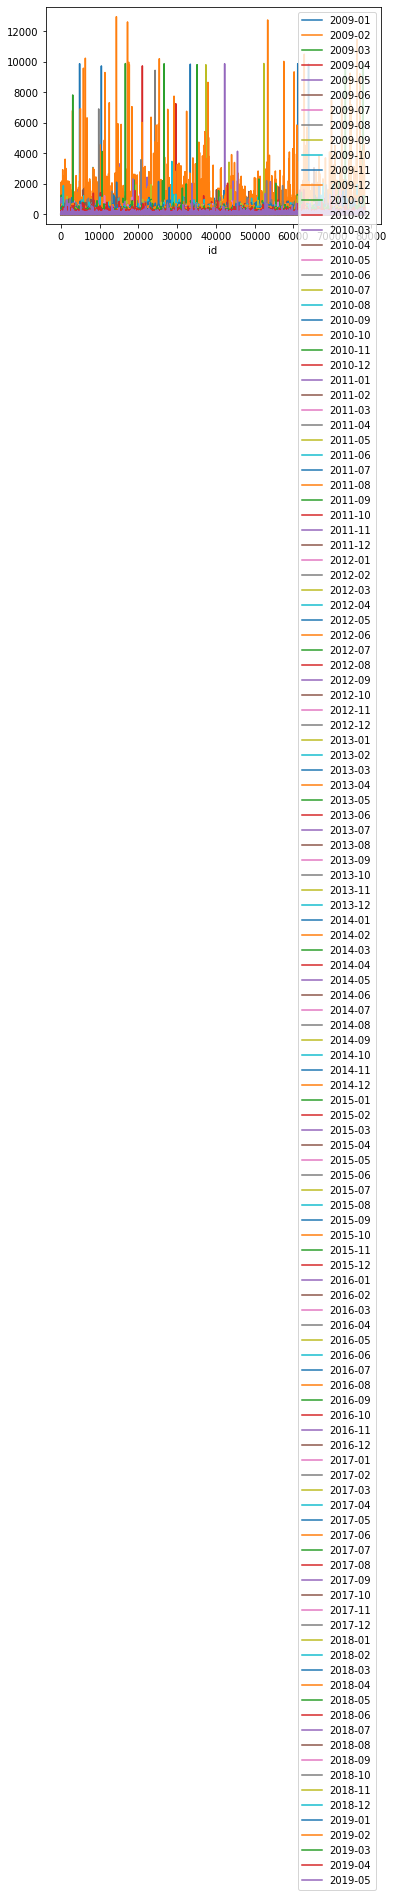

In [45]:
train.plot()
plt.show()

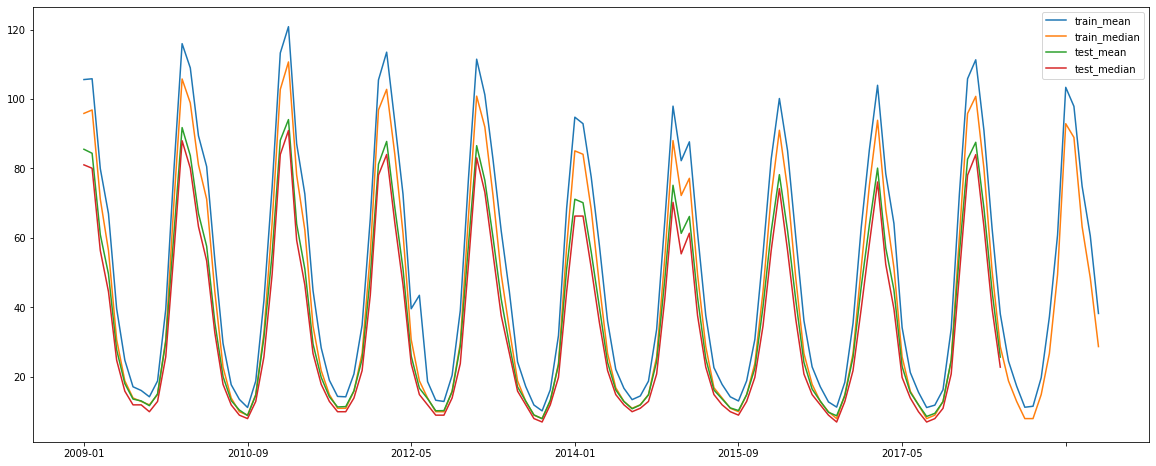

In [45]:
train.mean().plot(figsize=(20,8), label="train_mean")
train.median().plot(label="train_median")
test.mean().plot(label="test_mean")
test.median().plot(label="test_median")
plt.legend();


In [46]:
temp=pd.read_csv("busan_temp.csv", encoding="utf-8", index_col=0)

In [47]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 2009-01 to 2019-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   최고온도    121 non-null    float64
 1   최저온도    121 non-null    float64
dtypes: float64(2)
memory usage: 2.8+ KB


In [48]:
tr_train=train.transpose()
tr_train

id,0,1,2,3,4,5,6,7,8,9,...,78577,78578,78579,78580,78581,78582,78583,78584,78585,78586
2009-01,26.68,107.73,94.88,0.00,97.85,98.84,87.96,165.06,82.03,151.22,...,52.38,43.48,62.26,70.17,0.00,123.55,15.81,36.57,196.69,0.00
2009-02,11.86,77.09,90.93,0.00,97.85,137.38,83.02,86.97,116.63,155.17,...,41.51,29.65,66.22,140.35,0.00,129.48,0.00,25.69,198.66,0.00
2009-03,19.77,79.09,78.10,149.29,70.19,133.47,65.25,71.18,51.41,109.74,...,33.61,14.83,26.69,72.17,0.00,91.94,0.00,7.90,157.20,0.00
2009-04,14.83,4.94,66.24,51.41,60.31,77.11,61.29,51.41,49.43,106.77,...,18.78,9.88,21.75,52.40,58.33,50.42,88.98,8.89,140.39,0.00
2009-05,7.90,48.44,38.55,6.92,31.63,37.57,21.75,23.72,39.54,62.28,...,7.90,10.87,3.95,21.75,67.23,26.69,176.97,5.93,85.02,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01,9.88,145.28,130.45,158.12,26.68,74.12,73.13,95.86,79.06,56.33,...,6.91,118.59,58.30,157.13,296.49,92.90,46.45,18.77,184.81,55.34
2019-02,0.00,56.33,71.15,159.11,32.61,90.92,87.95,41.50,67.20,62.26,...,22.73,5.92,43.48,168.99,260.91,81.04,53.36,22.73,156.15,50.40
2019-03,2.96,62.26,0.00,105.75,19.76,54.36,60.29,49.42,58.31,46.45,...,25.69,202.62,12.84,123.55,179.88,70.17,36.57,17.79,100.81,65.23
2019-04,7.90,58.31,0.00,86.97,21.74,50.40,26.68,205.58,44.47,37.55,...,7.90,58.31,10.87,127.50,135.41,56.33,44.47,9.88,91.92,0.00


In [49]:
train_m=train.mean(axis=1)
train_m.to_csv("mean")
train_m

id
0        10.71400
1        36.87408
2        59.99048
3        36.47256
4        28.81544
           ...   
78582    43.53512
78583    50.27600
78584    12.65816
78585    73.59224
78586    30.93776
Length: 78587, dtype: float64

In [50]:
train_m1=tr_train.mean(axis=1)
train_m1.to_csv("mean1")

In [51]:
f_train=train>200
print(f_train.count())

2009-01    78587
2009-02    78587
2009-03    78587
2009-04    78587
2009-05    78587
           ...  
2019-01    78587
2019-02    78587
2019-03    78587
2019-04    78587
2019-05    78587
Length: 125, dtype: int64


In [13]:
import missingno as msno

In [14]:
data1 = pd.read_csv('test.csv',sep=',')

In [15]:
data1=data1.replace(0,np.nan)

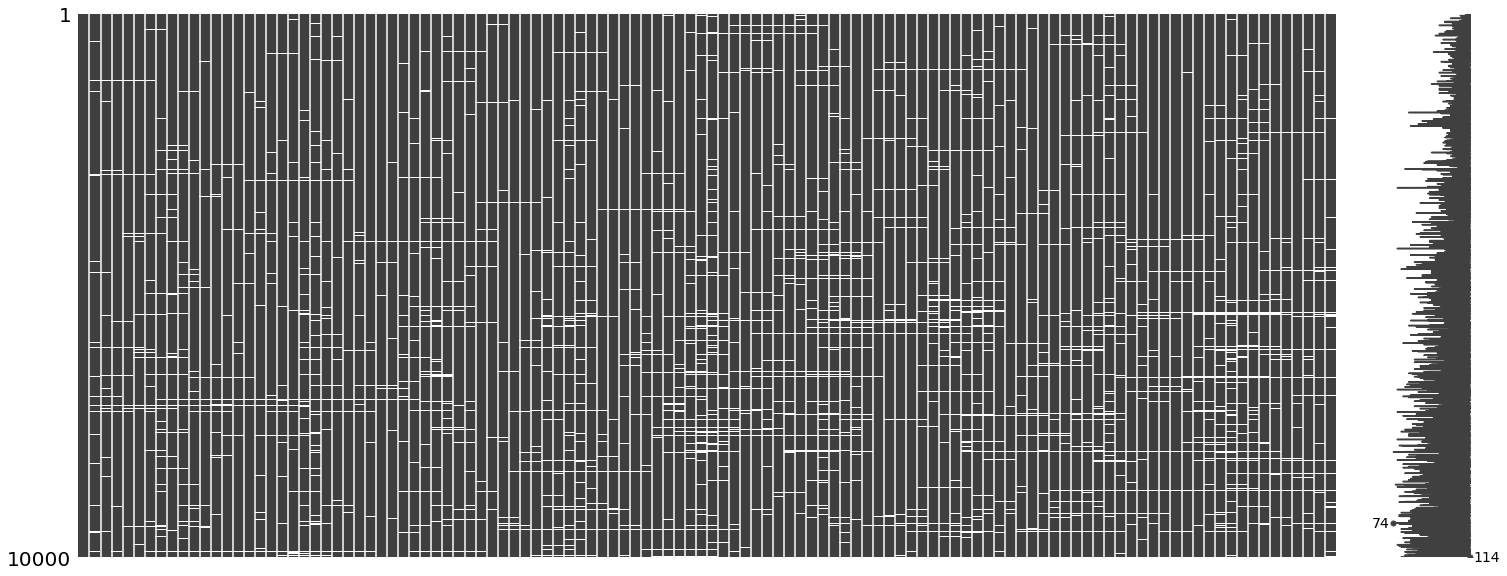

In [16]:
msno.matrix(data1)

In [26]:
spring

,2009-03,2009-04,2009-05,2010-03,2010-04,2010-05,2011-03,2011-04,2011-05,2012-03,...,2016-05,2017-03,2017-04,2017-05,2018-03,2018-04,2018-05,2019-03,2019-04,2019-05
id,,,,,,,,,,,,,,,,,,,,,
0,19.77,14.83,7.90,23.72,13.83,11.86,26.68,16.80,9.88,18.78,...,6.91,3.95,5.92,4.94,8.89,9.88,7.90,2.96,7.90,4.94
1,79.09,4.94,48.44,39.53,46.45,48.43,84.02,40.52,24.71,39.55,...,20.75,79.04,39.52,29.64,88.94,54.35,37.55,62.26,58.31,32.61
2,78.10,66.24,38.55,36.57,29.65,32.61,98.85,85.99,89.95,169.08,...,36.57,57.30,30.63,25.69,88.94,233.23,92.90,0.00,0.00,0.00
3,149.29,51.41,6.92,20.75,9.88,4.94,8.89,3.95,3.95,5.93,...,13.83,95.84,75.09,25.69,199.63,145.28,55.34,105.75,86.97,43.48
4,70.19,60.31,31.63,85.00,67.21,75.11,105.76,101.81,62.27,94.92,...,11.86,0.00,0.00,0.00,29.64,19.76,18.77,19.76,21.74,15.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78582,91.94,50.42,26.69,84.01,80.06,34.59,119.60,76.11,33.60,91.95,...,20.75,50.39,36.55,27.66,56.33,37.55,28.66,70.17,56.33,39.53
78583,0.00,88.98,176.97,196.69,89.94,28.66,95.88,93.90,95.88,126.56,...,19.76,41.50,30.63,32.60,58.30,31.62,29.64,36.57,44.47,29.65
78584,7.90,8.89,5.93,8.89,12.84,8.89,17.79,7.90,9.88,9.88,...,5.93,16.79,14.82,5.92,8.89,9.88,3.95,17.79,9.88,6.91


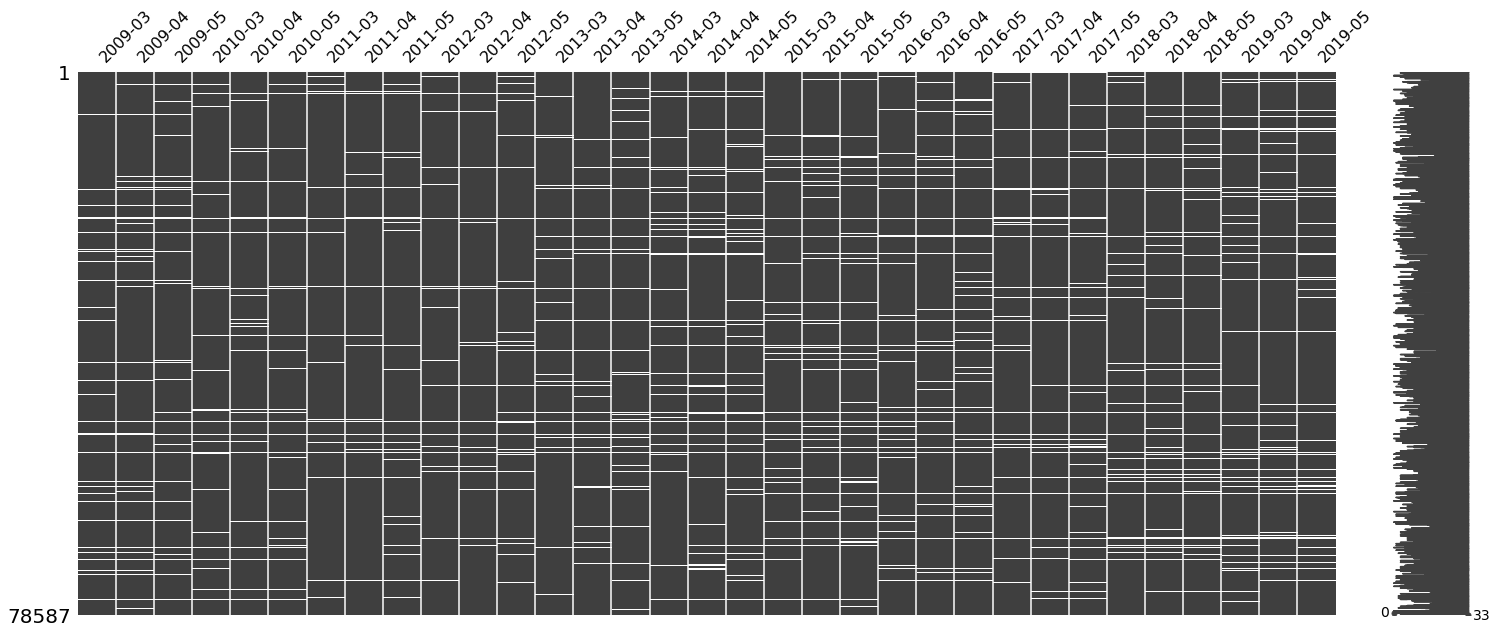

In [27]:
spring1=spring.replace(0,np.nan)
msno.matrix(spring1)

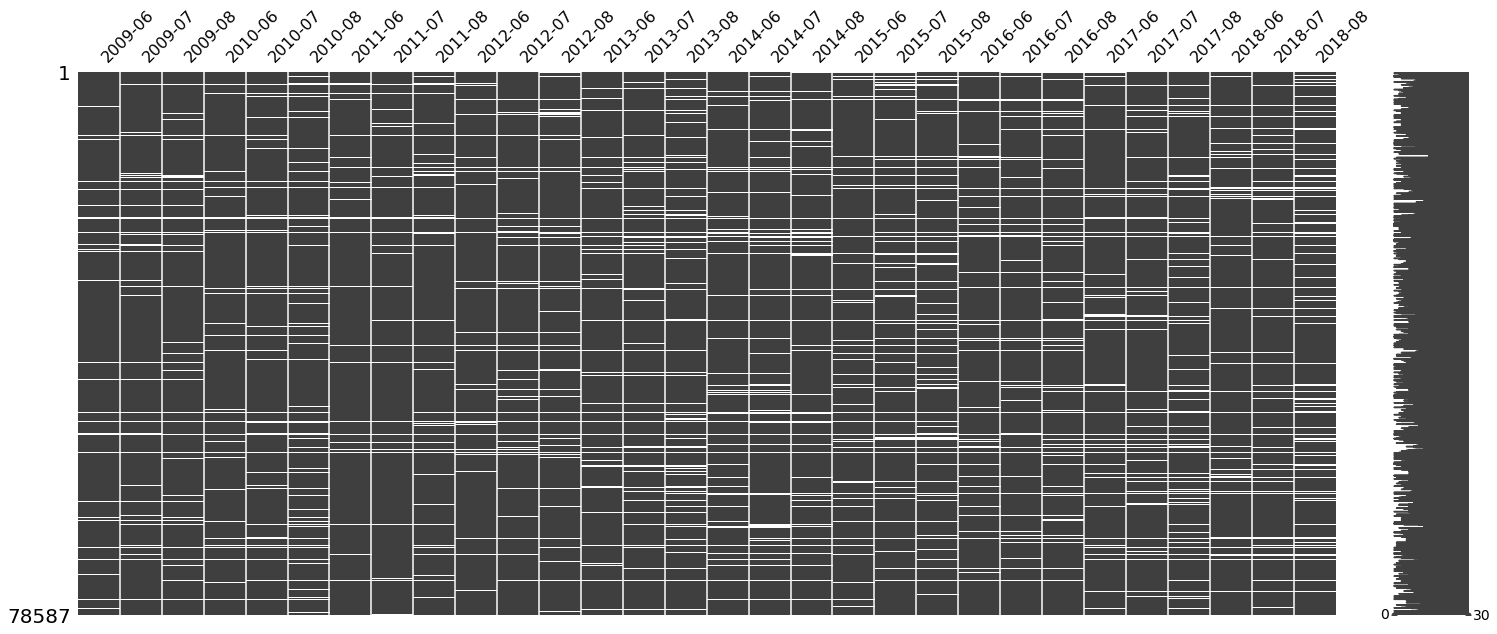

In [28]:
summer1=summer.replace(0,np.nan)
msno.matrix(summer1)

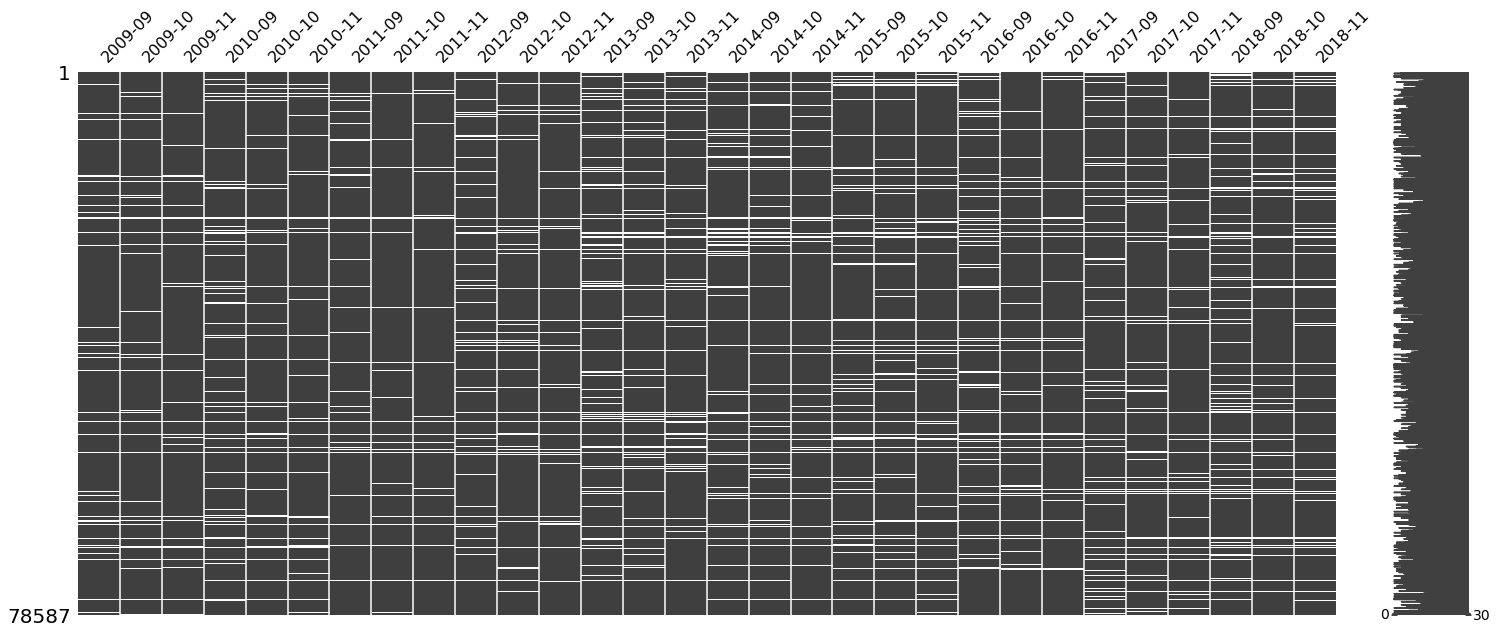

In [29]:
fall1=fall.replace(0,np.nan)
msno.matrix(fall1)

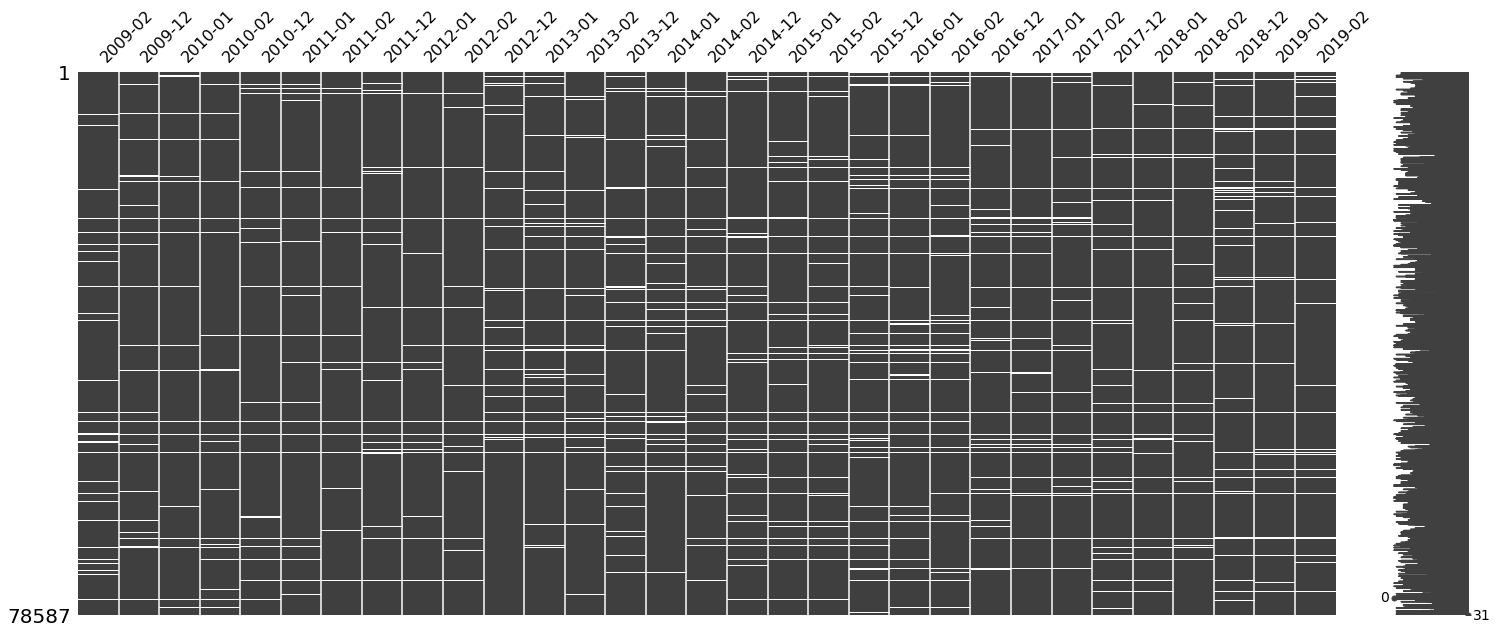

In [30]:
winter1=winter.replace(0,np.nan)
msno.matrix(winter1)

In [96]:
spring2=spring1[:].astype(np.float)
spring3=spring2.transpose()
spring3

id,0,1,2,3,4,5,6,7,8,9,...,78577,78578,78579,78580,78581,78582,78583,78584,78585,78586
2009-03,19.77,79.09,78.10,149.29,70.19,133.47,65.25,71.18,51.41,109.74,...,33.61,14.83,26.69,72.17,NaN,91.94,NaN,7.90,157.20,NaN
2009-04,14.83,4.94,66.24,51.41,60.31,77.11,61.29,51.41,49.43,106.77,...,18.78,9.88,21.75,52.40,58.33,50.42,88.98,8.89,140.39,NaN
2009-05,7.90,48.44,38.55,6.92,31.63,37.57,21.75,23.72,39.54,62.28,...,7.90,10.87,3.95,21.75,67.23,26.69,176.97,5.93,85.02,NaN
2010-03,23.72,39.53,36.57,20.75,85.00,118.60,19.76,97.85,55.35,117.61,...,NaN,32.61,37.55,88.95,148.26,84.01,196.69,8.89,131.45,85.99
2010-04,13.83,46.45,29.65,9.88,67.21,102.79,18.77,14.82,74.13,107.73,...,NaN,20.75,NaN,NaN,122.56,80.06,89.94,12.84,140.35,64.24
2010-05,11.86,48.43,32.61,4.94,75.11,44.47,9.88,6.91,27.67,66.22,...,NaN,7.90,2.96,NaN,67.21,34.59,28.66,8.89,72.15,34.59
2011-03,26.68,84.02,98.85,8.89,105.76,106.75,16.80,53.37,53.37,71.17,...,23.72,206.59,25.70,42.50,126.52,119.60,95.88,17.79,129.49,40.52
2011-04,16.80,40.52,85.99,3.95,101.81,90.94,22.73,36.57,40.52,42.50,...,10.87,243.17,20.75,12.85,106.75,76.11,93.90,7.90,108.73,40.52
2011-05,9.88,24.71,89.95,3.95,62.27,68.20,24.71,26.68,13.83,17.79,...,6.91,41.51,20.75,NaN,50.41,33.60,95.88,9.88,64.25,29.65
2012-03,18.78,39.55,169.08,5.93,94.92,97.89,NaN,53.39,67.23,28.67,...,NaN,206.65,28.67,NaN,143.37,91.95,126.56,9.88,157.21,50.42


In [101]:
pip install stan


  Created wheel for stan: filename=stan-0.0.5-py3-none-any.whl size=1170 sha256=ec785bfa866dabc300b78cdccd0170deecce6c6b5a6e7628f1a404b7028f478e
  Stored in directory: /Users/yunsubin/Library/Caches/pip/wheels/13/30/16/864dad75cc3171acb7f6ba31099f05a2465ca613a198eafb07
Successfully built stan
Note: you may need to restart the kernel to use updated packages.


In [17]:
import matplotlib.pyplot as plt

In [18]:
m1=test.loc[:, ['2009-01','2010-01','2011-01','2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01']]
m2=test.loc[:, ['2009-02','2010-02','2011-02','2012-02','2013-02','2014-02','2015-02','2016-02','2017-02','2018-02']]
m3=test.loc[:, ['2009-03','2010-03','2011-03','2012-03','2013-03','2014-03','2015-03','2016-03','2017-03','2018-03']]

m4=test.loc[:, ['2009-04','2010-04','2011-04','2012-04','2013-04','2014-04','2015-04','2016-04','2017-04','2018-04']]
m5=test.loc[:, ['2009-05','2010-05','2011-05','2012-05','2013-05','2014-05','2015-05','2016-05','2017-05','2018-05']]
m6=test.loc[:, ['2009-06','2010-06','2011-06','2012-06','2013-06','2014-06','2015-06','2016-06','2017-06']]


m7=test.loc[:, ['2009-07','2010-07','2011-07','2012-07','2013-07','2014-07','2015-07','2016-07','2017-07']]
m8=test.loc[:, ['2009-08','2010-08','2011-08','2012-08','2013-08','2014-08','2015-08','2016-08','2017-08']]
m9=test.loc[:, ['2009-09','2010-09','2011-09','2012-09','2013-09','2014-09','2015-09','2016-09','2017-09']]


m10=test.loc[:, ['2009-10','2010-10','2011-10','2012-10','2013-10','2014-10','2015-10','2016-10','2017-10']]
m11=test.loc[:, ['2009-11','2010-11','2011-11','2012-11','2013-11','2014-11','2015-11','2016-11','2017-11']]
m12=test.loc[:, ['2009-12','2010-12','2011-12','2012-12','2013-12','2014-12','2015-12','2016-12','2017-12']]





In [19]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [20]:
from sklearn.decomposition import PCA

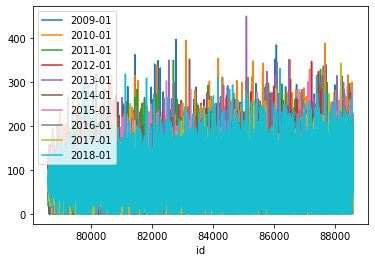

In [21]:
m1.plot()

In [22]:
rm1=m1.replace(0,np.nan)

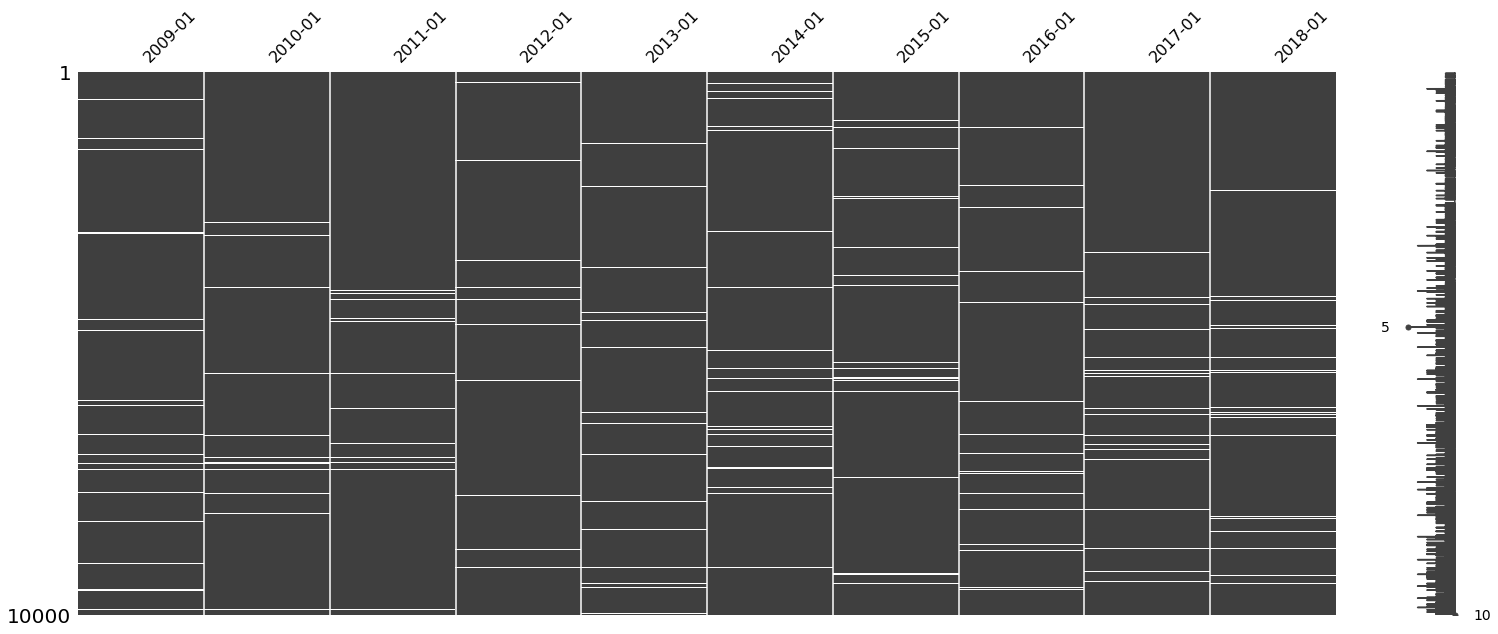

In [23]:
msno.matrix(rm1)

In [24]:
m1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 78587 to 88586
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   2009-01  10000 non-null  float64
 1   2010-01  10000 non-null  float64
 2   2011-01  10000 non-null  float64
 3   2012-01  10000 non-null  float64
 4   2013-01  10000 non-null  float64
 5   2014-01  10000 non-null  float64
 6   2015-01  10000 non-null  float64
 7   2016-01  10000 non-null  float64
 8   2017-01  10000 non-null  float64
 9   2018-01  10000 non-null  float64
dtypes: float64(10)
memory usage: 859.4 KB


In [25]:
m1.mean()

2009-01    85.533564
2010-01    91.776651
2011-01    88.129275
2012-01    81.228291
2013-01    86.575877
2014-01    71.135037
2015-01    75.155602
2016-01    61.896588
2017-01    63.722749
2018-01    82.680122
dtype: float64

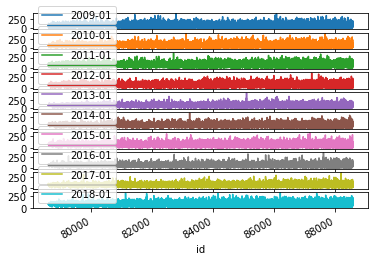

In [26]:
m1.plot(subplots=True)
plt.show()

In [46]:
tm1

id,78587,78588,78589,78590,78591,78592,78593,78594,78595,78596,...,88577,88578,88579,88580,88581,88582,88583,88584,88585,88586
2009-01,74.13,41.51,82.03,89.94,17.79,135.41,79.07,116.63,79.07,103.78,...,88.95,117.61,197.68,62.26,131.45,197.68,134.42,74.13,24.71,190.76
2010-01,83.05,48.44,87.00,72.17,47.45,82.06,89.97,87.00,97.88,79.09,...,123.58,113.70,114.68,94.91,121.61,130.50,138.41,24.71,29.66,213.55
2011-01,98.84,47.44,74.13,32.61,128.49,46.45,92.90,109.71,92.90,121.57,...,34.59,182.85,199.65,22.73,123.55,149.24,87.96,201.63,49.42,155.17
2012-01,74.13,63.26,83.03,98.85,80.06,85.01,85.99,61.28,108.73,93.90,...,29.65,117.63,195.72,13.83,129.49,102.80,169.03,229.33,0.00,99.83
2013-01,79.10,70.20,88.99,95.91,67.23,92.94,86.02,83.05,82.07,91.95,...,17.79,152.27,132.49,23.73,103.82,101.84,161.17,63.28,31.64,187.87
2014-01,69.25,110.80,82.11,89.03,112.78,76.17,77.16,84.09,71.22,92.99,...,62.32,151.36,123.66,29.67,108.82,97.94,97.94,48.47,49.46,134.54
2015-01,74.19,92.98,86.06,79.13,74.19,92.98,79.13,87.04,76.16,98.92,...,51.43,166.18,131.56,46.49,127.60,136.50,116.72,0.00,19.78,130.57
2016-01,73.20,81.12,68.26,60.34,91.01,69.25,72.21,77.16,74.19,63.31,...,14.83,96.95,50.45,46.49,120.69,86.06,61.33,55.40,41.55,125.64
2017-01,69.18,101.80,67.21,91.92,73.14,49.42,88.95,71.16,72.15,54.36,...,32.61,126.51,94.88,0.00,153.20,155.17,57.32,11.86,26.68,125.52
2018-01,83.98,82.01,81.02,64.22,83.98,78.05,88.92,70.15,90.90,59.28,...,46.44,182.79,78.05,105.72,131.41,178.84,222.32,35.57,49.40,127.46


In [49]:
m1.mean()

2009-01    85.533564
2010-01    91.776651
2011-01    88.129275
2012-01    81.228291
2013-01    86.575877
2014-01    71.135037
2015-01    75.155602
2016-01    61.896588
2017-01    63.722749
2018-01    82.680122
dtype: float64

In [50]:
m1.var()

2009-01    2852.559486
2010-01    2655.082424
2011-01    2365.176226
2012-01    2073.012163
2013-01    2360.002794
2014-01    1821.053061
2015-01    1926.863481
2016-01    1522.306695
2017-01    1580.887792
2018-01    2446.682528
dtype: float64

In [56]:
train['2009-01']

id
0         26.68
1        107.73
2         94.88
3          0.00
4         97.85
          ...  
78582    123.55
78583     15.81
78584     36.57
78585    196.69
78586      0.00
Name: 2009-01, Length: 78587, dtype: float64

In [61]:
train_mean_09_01=np.mean(train['2009-01'])
train_mean_09_01

105.62602440606867